## Convolution 

More on: https://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [8]:
def convolution(image, kernel):
    # Get dimensions of image and kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Calculate padding
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    # Create a padded image
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image
    output_image = np.zeros_like(image)
    
    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            output_image[i, j] = np.sum(padded_image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
    return output_image

In [9]:
# Load the image
image = cv2.imread('stanford.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernels
kernel_blur = np.array([[1, 2, 1],
                         [2, 4, 2],
                         [1, 2, 1]]) / 16

kernel_sharpen = np.array([[0, -1, 0],
                            [-1, 5, -1],
                            [0, -1, 0]])

kernel_edge_detection = np.array([[-1, -1, -1],
                                   [-1, 8, -1],
                                   [-1, -1, -1]])

In [4]:
# Apply convolution
image_blurred = convolution(image, kernel_blur)
image_sharpened = convolution(image, kernel_sharpen)
image_edge_detected = convolution(image, kernel_edge_detection)

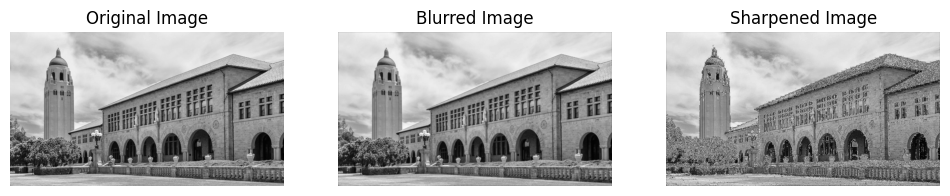

In [5]:
# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Blurred Image')
plt.imshow(image_blurred, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.title('Sharpened Image')
plt.imshow(image_sharpened, cmap='gray')
plt.axis('off')

plt.show()
